## Observations and Insights 

In [120]:
# Dependencies and Setup

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_mouse = pd.merge(mouse_metadata, study_results, on = "Mouse ID")

# Display the data table for preview
merge_mouse.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [121]:
# Checking the number of mice. also shows that the data doesnot need cleaning up
count = merge_mouse.count()
count

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [122]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = merge_mouse.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)
duplicates.head()



0    False
1    False
2    False
3    False
4    False
dtype: bool

In [123]:
# Optional: Get all the data for the duplicate mouse ID. 
merge_mouse[merge_mouse.duplicated()]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [124]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = merge_mouse.drop_duplicates(keep = "first")

In [125]:
# Checking the number of mice in the clean DataFrame.
count2 = clean_data.count()
count2

Mouse ID              1892
Drug Regimen          1892
Sex                   1892
Age_months            1892
Weight (g)            1892
Timepoint             1892
Tumor Volume (mm3)    1892
Metastatic Sites      1892
dtype: int64

In [126]:
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary Statistics

In [127]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

## Create new dataframe for Tumor Volume Changes as per drug, and timepoint
tumor_volume = clean_data.filter(['Drug Regimen','Tumor Volume (mm3)'], axis=1)
tumor_volume = tumor_volume.set_index('Drug Regimen')
tumor_volume_drug = tumor_volume.groupby(['Drug Regimen']) 
tumor_volume_drug.head()

### Calculate mean for each drug type
mean_tum_vol = pd.DataFrame(tumor_volume.groupby(['Drug Regimen']).mean())
mean_tum_vol = mean_tum_vol.rename(columns = {"Tumor Volume (mm3)": "Mean of Tumor Volume (mm3)"})
#mean_tum_vol.head(100)

###Calculate the median for each drug type
median_tum_vol = pd.DataFrame(tumor_volume.groupby(['Drug Regimen']).median())
median_tum_vol = median_tum_vol.rename(columns = {"Tumor Volume (mm3)": "Median of Tumor Volume (mm3)"})
#median_tum_vol.head(100)

###Calculate the variance for each drug type
var_tum_vol = pd.DataFrame(tumor_volume.groupby(['Drug Regimen']).var())
var_tum_vol = var_tum_vol.rename(columns = {"Tumor Volume (mm3)": "Varaince of Tumor Volume (mm3)"})
#var_tum_vol.head(100)

###Calculate the standard deviation for each drug type
stdvar_tum_vol = pd.DataFrame(tumor_volume.groupby(['Drug Regimen']).std())
stdvar_tum_vol = stdvar_tum_vol.rename(columns = {"Tumor Volume (mm3)": "Standard Deviation of Tumor Volume (mm3)"})
#stdvar_tum_vol.head(100)

###Calculate the SEM for each drug type
sem_tum_vol = pd.DataFrame(tumor_volume.groupby(['Drug Regimen']).sem())
sem_tum_vol = sem_tum_vol.rename(columns = {"Tumor Volume (mm3)": "SEM of Tumor Volume (mm3)"})
#sem_tum_vol.head(100)


In [128]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats = pd.concat([mean_tum_vol,median_tum_vol,var_tum_vol,stdvar_tum_vol,sem_tum_vol],axis=1)
summary_stats.head(100)


,Mean of Tumor Volume (mm3),Median of Tumor Volume (mm3),Varaince of Tumor Volume (mm3),Standard Deviation of Tumor Volume (mm3),SEM of Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

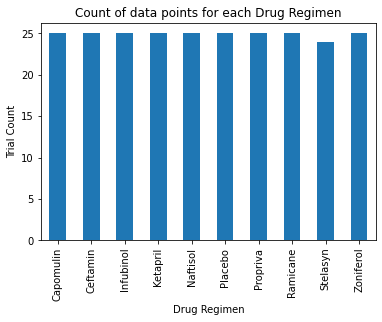

In [129]:
#Generate a bar plot showing the total count for each drug regimen throughout the course of the study
mouse_count_drug = clean_data.groupby(['Drug Regimen'])['Mouse ID'].nunique()
mouse_count_drug.head(100)

#create bar chart
count_plot = mouse_count_drug.plot.bar()
count_plot.set_xlabel("Drug Regimen")
count_plot.set_ylabel("Trial Count")
plt.title("Count of data points for each Drug Regimen")

#Save Figure
plt.savefig("figures/BarChart_MouseCount.png")
plt.show()

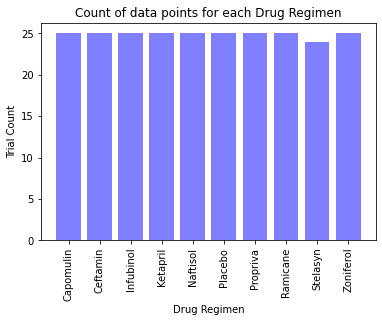

In [130]:
# Generate a bar plot showing the total number of UNIQUE mice for each treatment throughout the course of the study using pyplot.

#Use the same groupby dataframe as before
# Set X-axis and Tick locations

x_axis = mouse_count_drug.index
y_axis = mouse_count_drug

plt.bar(x_axis, y_axis, color="b", alpha=0.5, align="center")

# Set a Title and labels
plt.title("Count of data points for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Trial Count")
plt.xticks(rotation = 90)

# Save the figure
plt.savefig("figures/PyplotBarChart.png")
plt.show()


In [131]:
# Generate data for  pie plot 
groupby_gender = clean_data.groupby("Sex")
groupby_gender_count = pd.DataFrame(groupby_gender["Sex"].count())
groupby_gender_count.head(100)


,Sex
Sex,
Female,934
Male,958


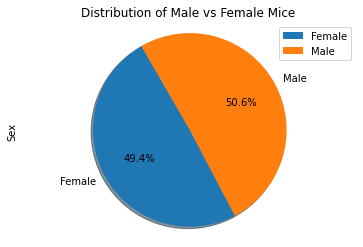

In [132]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_pie = groupby_gender_count.plot(kind="pie", y="Sex",
                                  title = ("Distribution of Male vs Female Mice"),
                                  autopct="%1.1f%%", shadow=True, startangle=120)
plt.axis("equal")
plt.savefig("figures/PandaPieChart.png")
plt.show()



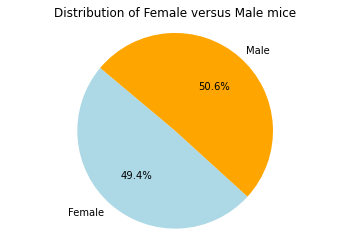

In [133]:
genders = list(groupby_gender_count.index.values)
gender_counts = groupby_gender_count["Sex"]
colors = ["lightblue", "orange"]

plt.pie(gender_counts, labels=genders, colors=colors, autopct="%1.1f%%", startangle=140)

plt.title("Distribution of Female versus Male mice")
plt.axis("equal")
plt.savefig("figures/PyplotPieChart.png")
plt.show()

## Quartiles, Outliers and Boxplots

In [134]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#Create new DF for the four drugs
drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

#use asin function to extract these four drugs
four_drugs = clean_data[clean_data['Drug Regimen'].isin(drug_list)]
four_drugs.head()

#Group the data by Drug and Mouse ID
last_tumor_drug = four_drugs.groupby(["Mouse ID","Drug Regimen"]) 
#last_tumor_drug.head(100)
                    

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = pd.DataFrame(four_drugs.groupby(["Mouse ID","Drug Regimen"])["Timepoint"].max())
#max_timepoint.head(100)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_time_vol = pd.merge(max_timepoint, four_drugs, on = "Timepoint")
merge_time_vol = merge_time_vol.set_index('Drug Regimen')
merge_time_vol.head(100)


,Timepoint,Mouse ID,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Ramicane,45,k403,Male,21,16,22.050126,1
Capomulin,45,s185,Female,3,17,23.343598,1
Capomulin,45,x401,Female,16,15,28.484033,0
Capomulin,45,m601,Male,22,17,28.430964,1
Ramicane,45,g791,Male,11,16,29.128472,1
...,...,...,...,...,...,...,...
Capomulin,45,g316,Female,22,22,40.159220,2
Capomulin,45,s710,Female,1,23,40.728578,1
Capomulin,45,l509,Male,17,21,41.483008,3


In [140]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
iqr_combined = []
lower = []
upper = []
outliers_data = []
tum_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for drug in drug_list:
    
    volume = clean_data.loc[clean_data['Drug Regimen'] == drug]['Tumor Volume (mm3)']
    tum_vol.append(volume)
        
    quantiles = volume.quantile([0.25, 0.5, 0.75])
    Q1 = quantiles[0.25].round(2)
    Q3 = quantiles[0.75].round(2)
    iqr = round(Q3 - Q1,2)
    lower_bound = round(Q1 - (1.5*iqr),2)
    upper_bound = round(Q3 + (1.5*iqr),2)
    outliers = volume.loc[(volume < lower_bound) | (volume > upper_bound)]
        
    #fill lists
    iqr_combined.append(iqr)
    lower.append(lower_bound)
    upper.append(upper_bound)
    outliers_data.append(outliers)
        
#Displays Results
results = pd.DataFrame({'Drug Regimen': drug_list,
                       'IQR': iqr_combined,
                       'Lower Bound': lower,
                       'Upper Bound': upper,
                       'Outliers': outliers_data}).set_index('Drug Regimen')

results
    

,IQR,Lower Bound,Upper Bound,Outliers
Drug Regimen,,,,
Capomulin,7.31,26.72,55.96,18 25.472143 19 23.343598 Name: Tumor Vo...
Ramicane,8.33,24.18,57.50,"9 22.050126 Name: Tumor Volume (mm3), dtype..."
Infubinol,10.00,32.31,72.31,"Series([], Name: Tumor Volume (mm3), dtype: fl..."
Ceftamin,9.59,32.83,71.18,"Series([], Name: Tumor Volume (mm3), dtype: fl..."


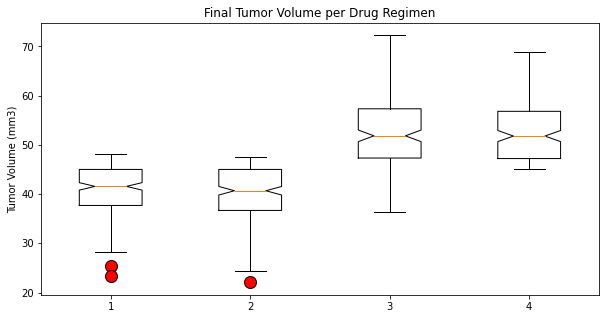

In [164]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

plt.figure(figsize=(10,5))
plt.title('Final Tumor Volume per Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.boxplot(tum_vol, drug_list, flierprops=dict(markerfacecolor='red',markersize=12))

plt.savefig("figures/BoxPlot_FinalVolasperDrug.png")
plt.show()







## Line and Scatter Plots

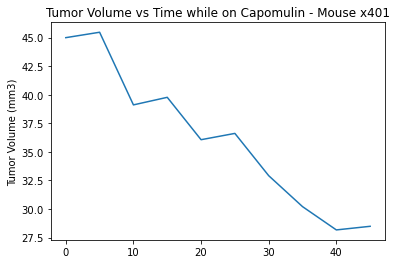

In [165]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
drug_capo = clean_data[clean_data['Drug Regimen'] == 'Capomulin']
drug_capox401 = drug_capo[drug_capo['Mouse ID'] == 'x401']

x_axis = drug_capox401['Timepoint']
y_axis = drug_capox401['Tumor Volume (mm3)']

plt.plot(x_axis, y_axis)
plt.title('Tumor Volume vs Time while on Capomulin - Mouse x401')
plt.ylabel('Tumor Volume (mm3)')

plt.savefig("figures/LineChartCapomulin1.png")
plt.show()

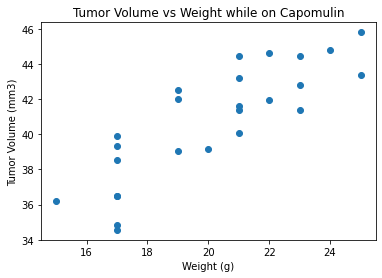

In [166]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

#use DF and group by Mose ID
grouped_capo = drug_capo.groupby('Mouse ID')

#Find Mean Tumor Volume
avg_tum = grouped_capo['Tumor Volume (mm3)'].mean()
avg_tum

weight = grouped_capo['Weight (g)'].unique()

#Create DF for avg tumor and weights
weight_tum = pd.DataFrame({"Weight":weight,
                          "Average Tumor Volume": avg_tum })

weight_tum

plt.scatter(weight_tum['Weight'], weight_tum["Average Tumor Volume"])
plt.title('Tumor Volume vs Weight while on Capomulin')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel("Weight (g)")

plt.savefig("figures/ScatterChartCapomulin1.png")
plt.show()



## Correlation and Regression

In [163]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#use values from weight dataframe to help with this correlation
weight = weight_tum['Weight']
avgtum = weight_tum["Average Tumor Volume"]

#Calc corr co-eff and p-value
correlation = sts.pearsonr(weight.astype(float),avg_tum.astype(float))

print(f"The correlation coefficient (r) is {round(correlation[0],2)}")
print(f"The p-value is {correlation[1]}")

#Calculate the Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight.astype(float), avgtum.astype(float))

regress_values = weight * slope + intercept

#Calculate the Equation of Line
equation_of_line = "y = " + str(round(slope,2)) + "x + "+ str(round(intercept,2))
equation_of_line

The correlation coefficient (r) is 0.84
The p-value is 1.322572243471279e-07


'y = 0.95x + 21.55'

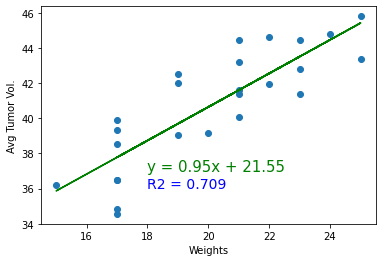

In [167]:
plt.scatter(weight,avgtum)
plt.plot(weight,regress_values,"green")
plt.annotate(equation_of_line,(18,37),color="green",fontsize=15)
plt.annotate(f"R2 = {round(rvalue**2,3)}",(18,36),fontsize=14,color="blue")
plt.xlabel('Weights')
plt.ylabel('Avg Tumor Vol.')

plt.savefig("figures/LinRegression.png")
plt.show()